In [35]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
def plot_metric(df: pd.DataFrame):
    # x軸：イテレーション（time/iterations）
    x = df["time/iterations"]

    # 可視化したい指標（必要に応じて追加・変更）
    metrics = ["train/approx_kl", "train/clip_fraction", "train/value_loss"]

    FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
    fm.fontManager.addfont(FONT_PATH)

    # FontPropertiesオブジェクト生成（名前の取得のため）
    font_prop = fm.FontProperties(fname=FONT_PATH)
    font_prop.get_name()

    plt.rcParams["font.family"] = font_prop.get_name()
    plt.rcParams["font.size"] = 12

    fig = plt.figure(figsize=(8, 8))
    n = 3
    ax = dict()
    gs = fig.add_gridspec(
        n, 1, wspace=0.0, hspace=0.0, height_ratios=[1 for i in range(n)]
    )
    for i, axis in enumerate(gs.subplots(sharex="col")):
        ax[i] = axis
        ax[i].grid()

    # プロット設定
    for i, metric in enumerate(metrics):
        if metric in df.columns:
            ax[i].plot(x, df[metric], label=metric)
            ax[i].set_xlabel("Iterations")
            ax[i].set_ylabel(metric)
            if i == 2:
                ax[i].set_yscale("log")

    ax[0].set_title("Training Metrics Over Iterations")

    plt.tight_layout()
    plt.show()

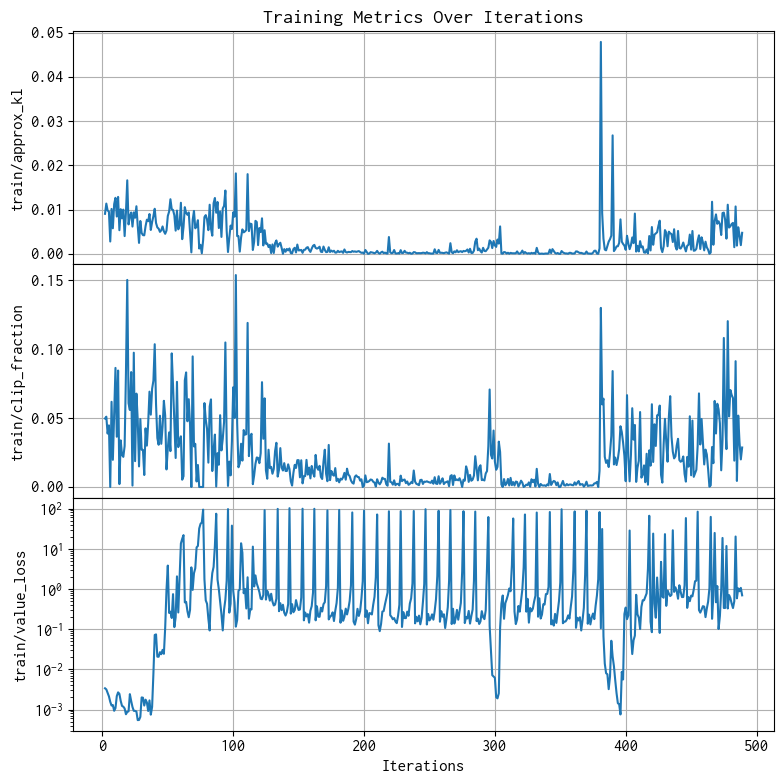

In [37]:
# CSVファイルの読み込み
name_csv = "../logs/7011/20251108163330/20250819/progress.csv"
df = pd.read_csv(name_csv)

plot_metric(df)